## 1) Data understanding, preparation and EDA (25%)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing data and checking shape

bikesharinginitial_df = pd.read_csv("day.csv")
bikesharinginitial_df.shape

(730, 16)

In [3]:
#checking data for null columns

bikesharinginitial_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [4]:
#checking numerical columns of the data

bikesharinginitial_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [5]:
#Deriving columns for analysis
#Extracting Day of the month from dteday
bikesharinginitial_df["dtedayofmonth"]= pd.to_datetime(bikesharinginitial_df[ "dteday"])
bikesharinginitial_df['dtedayofmonth']=bikesharinginitial_df[ "dtedayofmonth"].dt.day
bikesharinginitial_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,dtedayofmonth
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,1
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,1
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1


<AxesSubplot:>

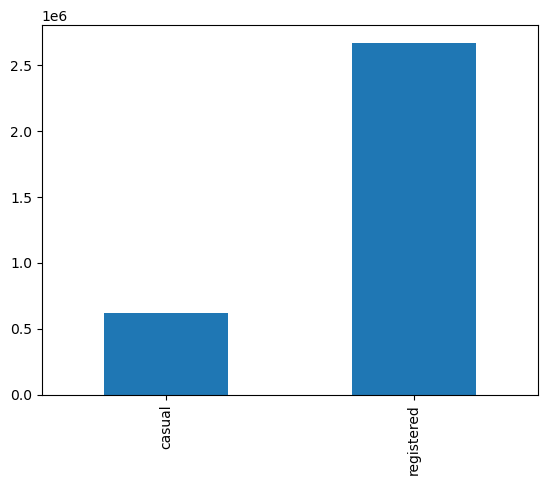

In [6]:
#Checking registered users vs casual users
usertype_df=pd.DataFrame()
usertype_df['casual']=bikesharinginitial_df['casual']
usertype_df['registered']=bikesharinginitial_df['registered']
usertype_df.sum().plot(kind="bar")

#### Removing unwanted columns
Dropping instant column as it just represents the index
Dropping dteday as data is already represented by other columns present
Dropping casual and registered as the count is represented by cnt for all users

In [7]:
bikesharinginitial_df=bikesharinginitial_df.drop(['casual', 'registered','dteday','instant'], axis=1)
bikesharinginitial_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,dtedayofmonth
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,1
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,1
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,1
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,1
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,1


#### Mapping columns to categorical values

In [8]:
bikesharinginitial_df["season"] = bikesharinginitial_df["season"].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [9]:
bikesharinginitial_df["mnth"] = bikesharinginitial_df["mnth"].map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [10]:
bikesharinginitial_df["weekday"] = bikesharinginitial_df["weekday"].map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [11]:
bikesharinginitial_df["weathersit"] = bikesharinginitial_df["weathersit"].map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

In [12]:
bikesharinginitial_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,dtedayofmonth
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985,1
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801,1
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,1
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,1
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,1


#### Checking for ouliers

<AxesSubplot:ylabel='windspeed'>

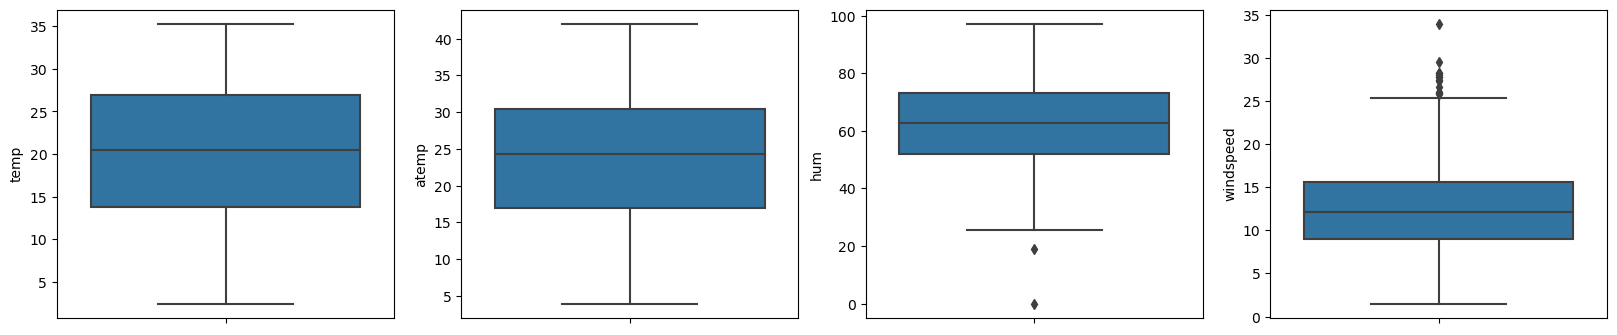

In [13]:
plt.figure(figsize=(20,4))
plt.subplot(1,4,1)
sns.boxplot(y="temp", data=bikesharinginitial_df)
plt.subplot(1,4,2)
sns.boxplot(y="atemp", data=bikesharinginitial_df)
plt.subplot(1,4,3)
sns.boxplot(y="hum", data=bikesharinginitial_df)
plt.subplot(1,4,4)
sns.boxplot(y="windspeed", data=bikesharinginitial_df)

In [14]:
bikesharinginitial_df.shape

(730, 13)

#### removing outliers for windspeed

In [15]:
bikesharinginitial_df = bikesharinginitial_df[bikesharinginitial_df["windspeed"] < bikesharinginitial_df["windspeed"].quantile(0.99)]
bikesharinginitial_df["windspeed"].describe()

count    722.000000
mean      12.584865
std        4.932673
min        1.500244
25%        9.000663
50%       12.041441
75%       15.500919
max       27.292182
Name: windspeed, dtype: float64

<AxesSubplot:ylabel='windspeed'>

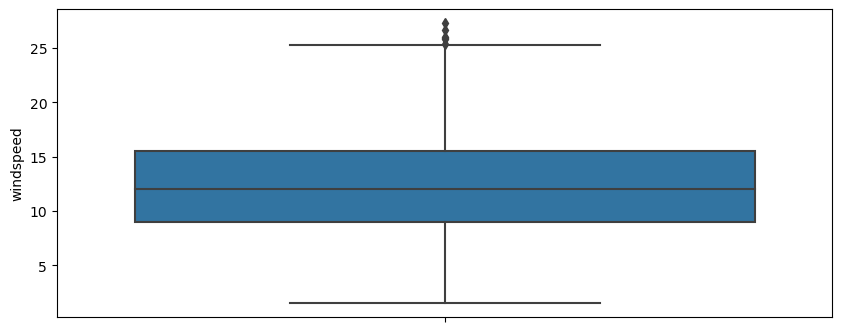

In [16]:
plt.figure(figsize=(10,4))
sns.boxplot(y="windspeed", data=bikesharinginitial_df)

In [17]:
bikesharinginitial_df.shape

(722, 13)

#### Checking for numerical values 

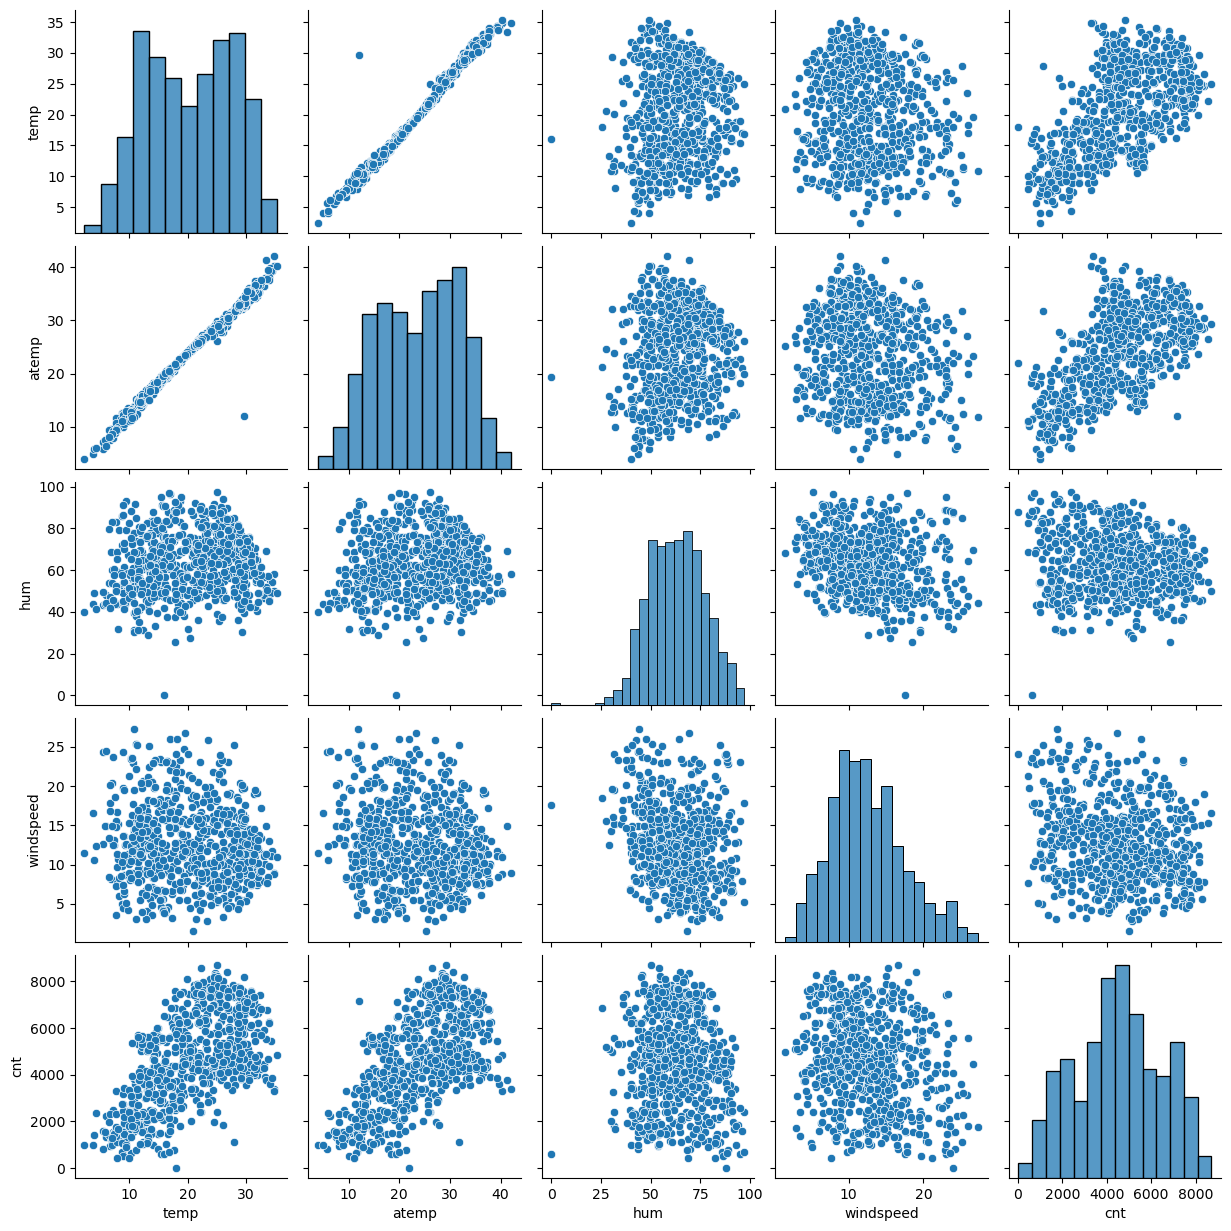

In [18]:
sns.pairplot(data=bikesharinginitial_df,vars=['temp','atemp','hum','windspeed','cnt'])
plt.show()

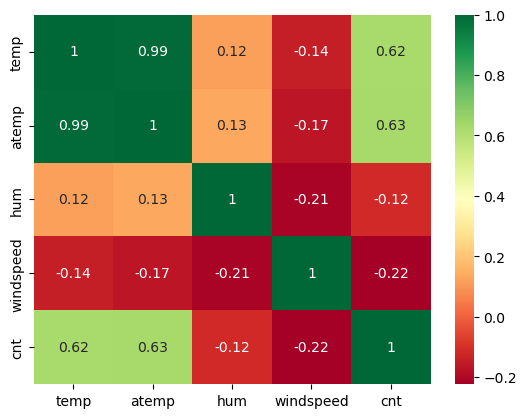

In [19]:
# Checking continuous variables relationship with each other
sns.heatmap(bikesharinginitial_df[['temp','atemp','hum','windspeed','cnt']].corr(), cmap='RdYlGn', annot = True)
plt.show()

temp and atemp has correlation more than .99 means almost 1 (highly correlated) and atemp seems to be derived from temp so atemp field can be dropped here only

In [20]:
bikesharinginitial_df.drop("atemp", axis=1, inplace=True)

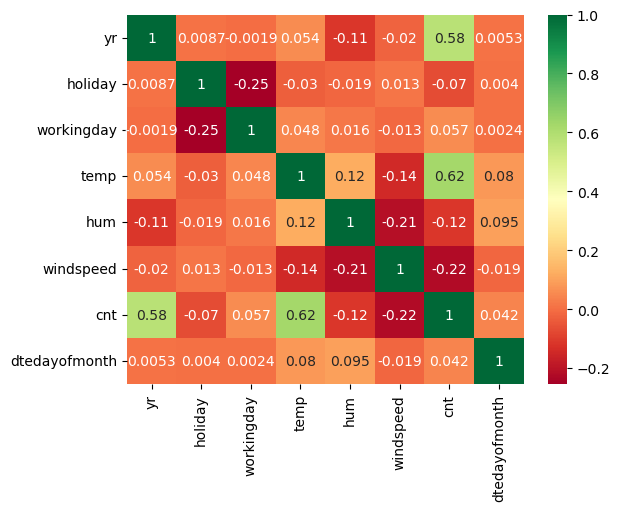

In [21]:
#Correlations for variables
cor=bikesharinginitial_df.corr()
sns.heatmap(cor, cmap="RdYlGn", annot = True)
plt.show()

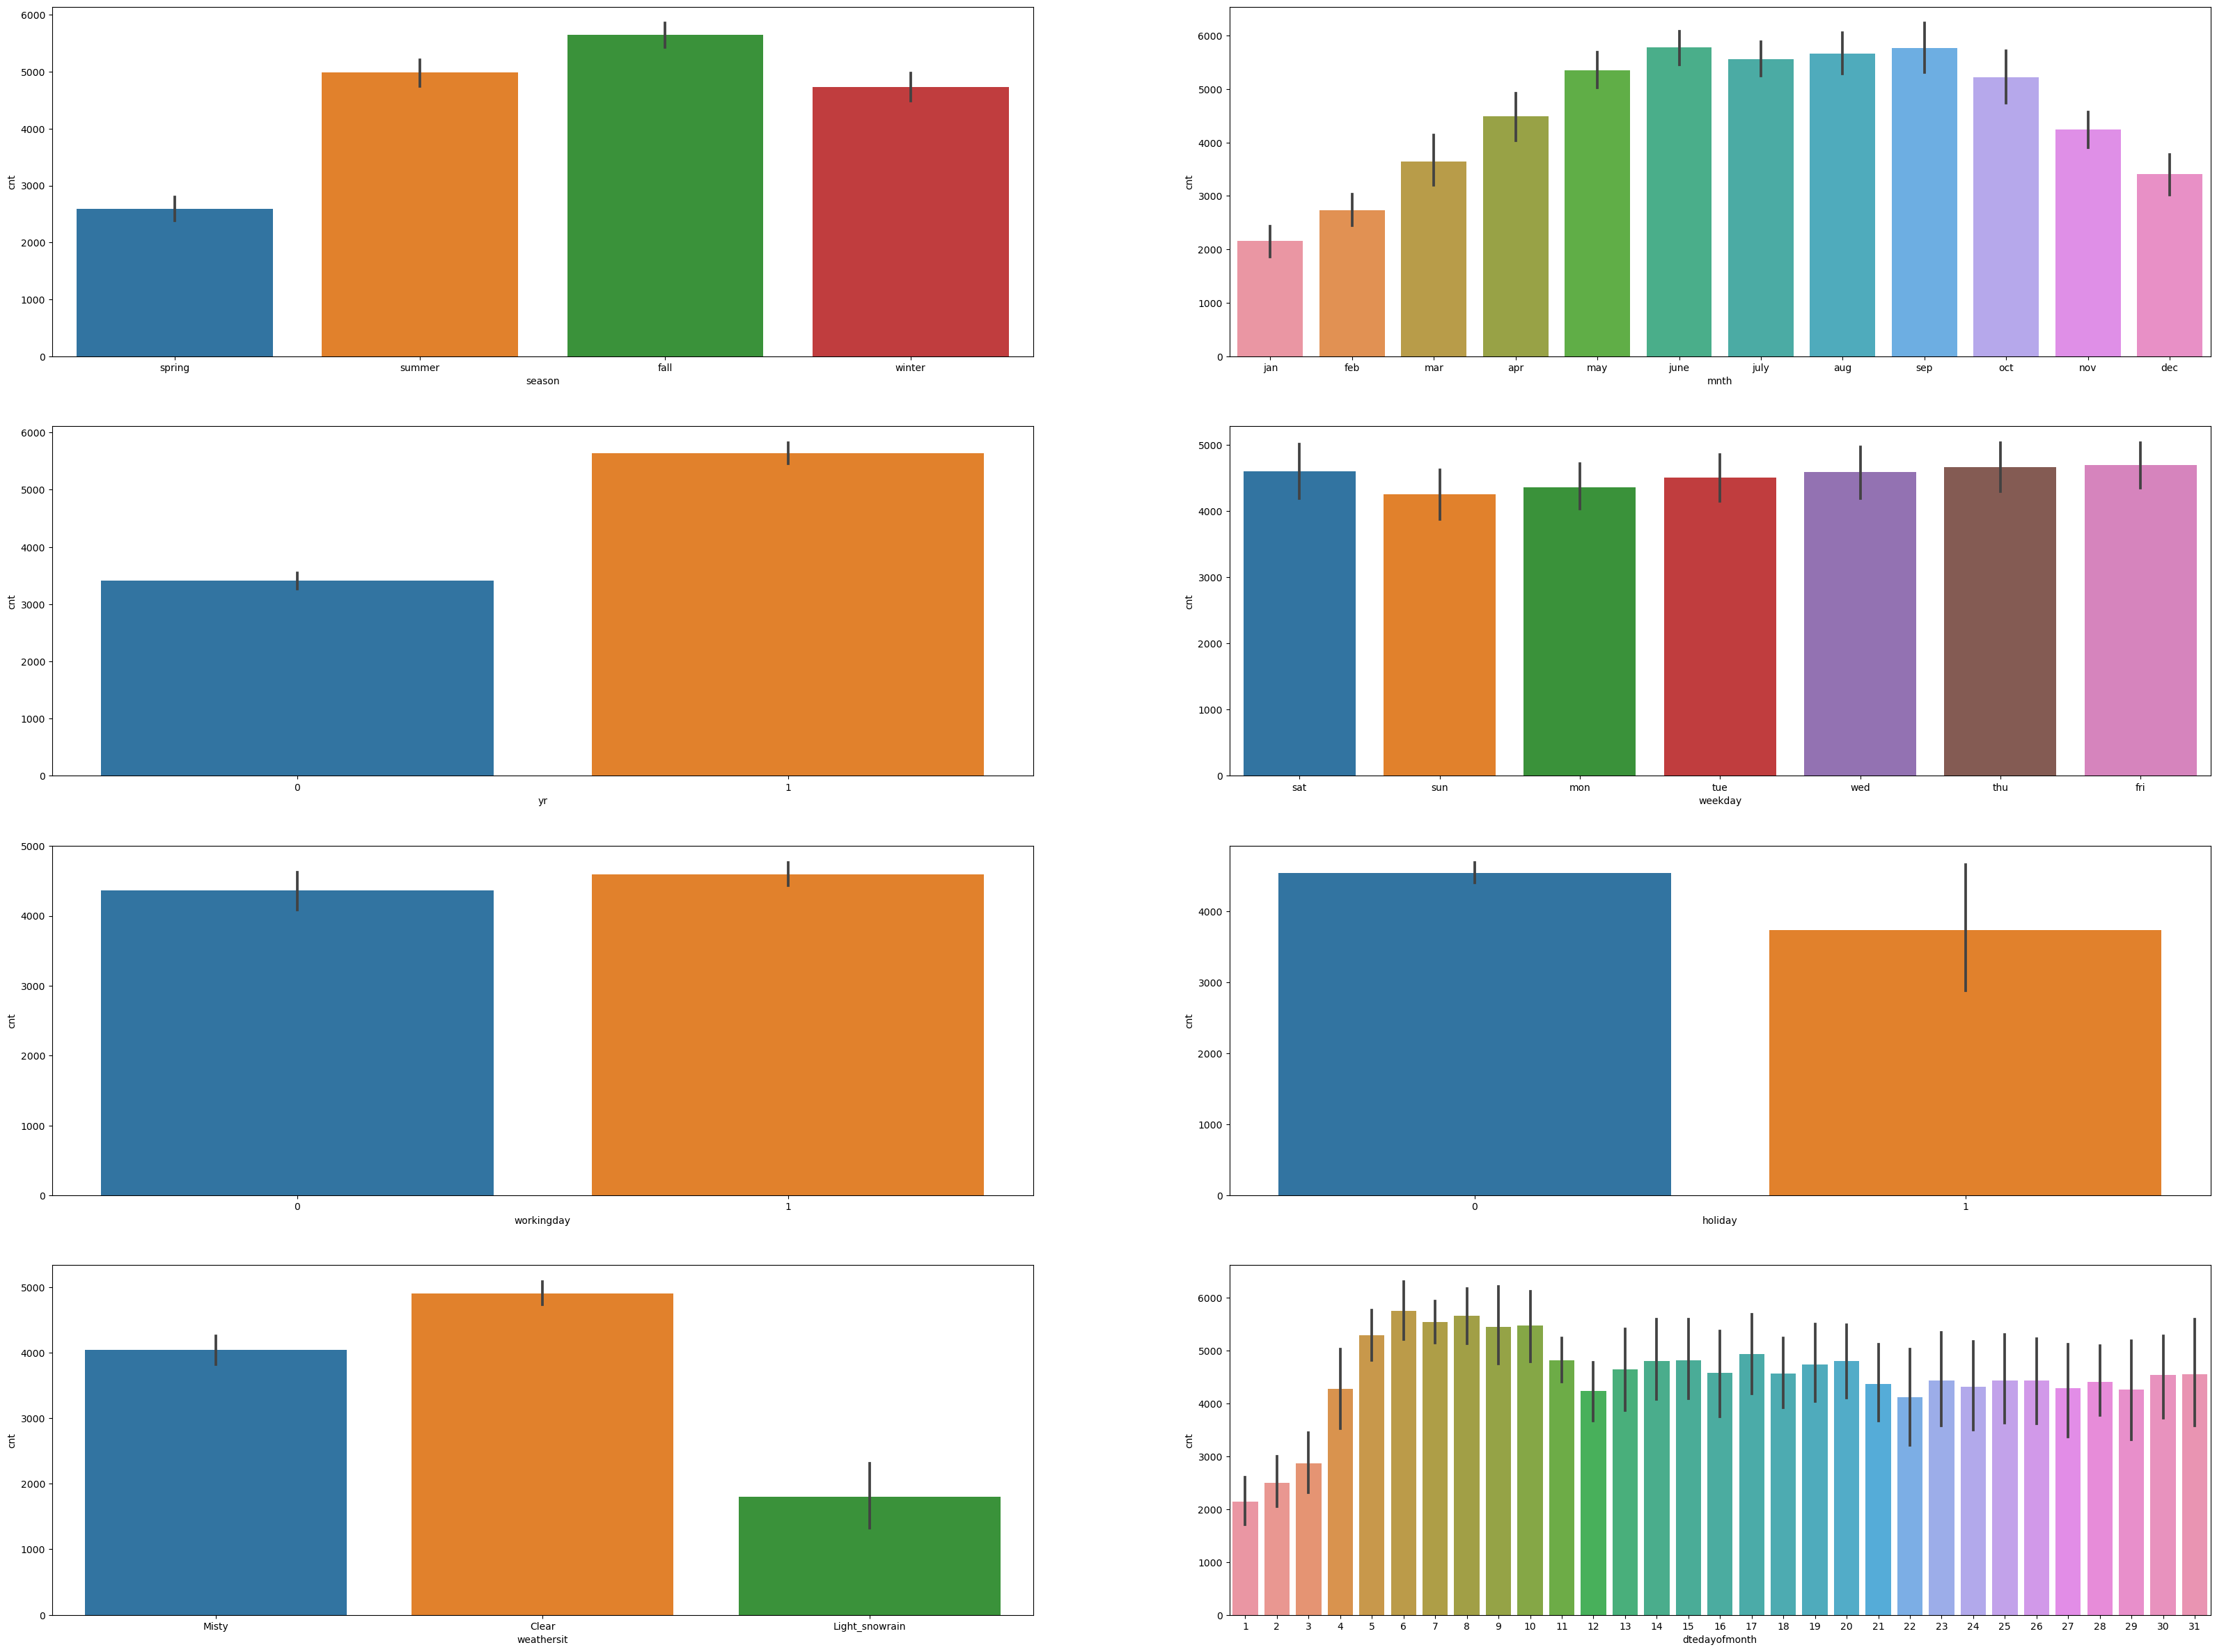

In [22]:
#Analysing categorical variables
plt.figure(figsize=(40, 30))
plt.subplot(4,2,1)
sns.barplot('season','cnt', data = bikesharinginitial_df)
plt.subplot(4,2,2)
sns.barplot('mnth','cnt', data = bikesharinginitial_df)
plt.subplot(4,2,3)
sns.barplot('yr','cnt', data = bikesharinginitial_df)
plt.subplot(4,2,4)
sns.barplot('weekday', 'cnt', data = bikesharinginitial_df)
plt.subplot(4,2,5)
sns.barplot('workingday', 'cnt', data = bikesharinginitial_df)
plt.subplot(4,2,6)
sns.barplot('holiday', 'cnt', data = bikesharinginitial_df)
plt.subplot(4,2,7)
sns.barplot('weathersit', 'cnt', data = bikesharinginitial_df)
plt.subplot(4,2,8)
sns.barplot('dtedayofmonth', 'cnt', data = bikesharinginitial_df)
plt.show()

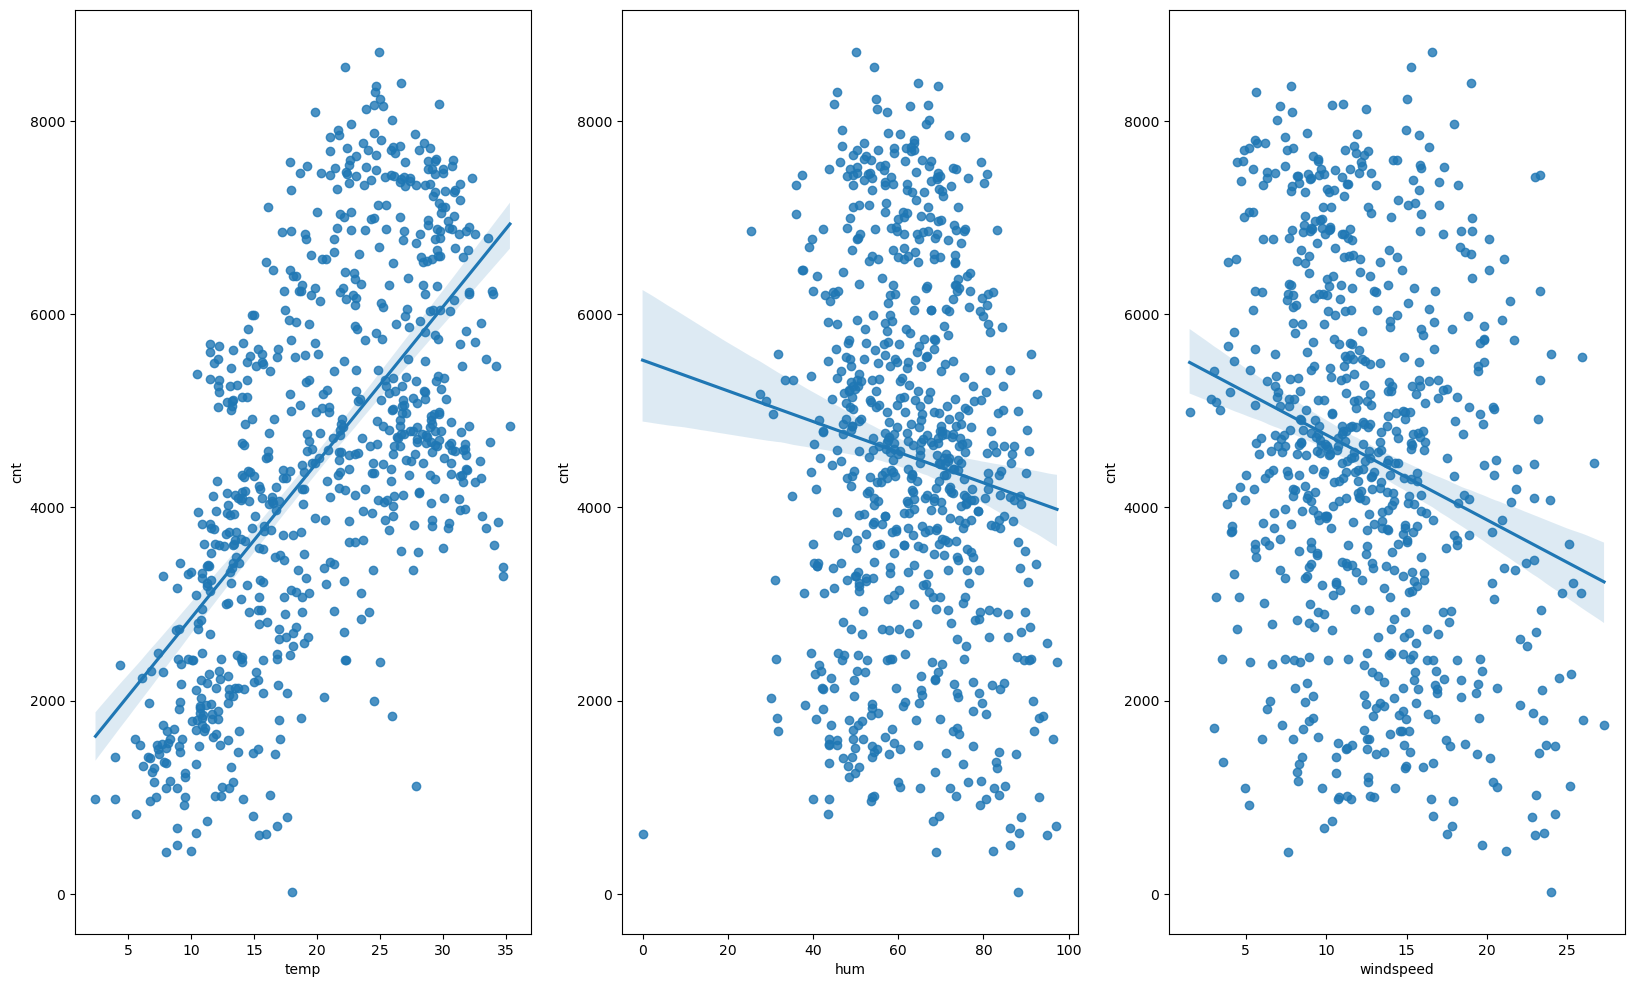

In [23]:
#comparison of count with numerical variables
plt.figure(figsize=(20, 12))
plt.subplot(1,3,1)
sns.regplot(y="cnt",x="temp",data=bikesharinginitial_df)
plt.subplot(1,3,2)
sns.regplot(y="cnt",x="hum",data=bikesharinginitial_df)
plt.subplot(1,3,3)
sns.regplot(y="cnt",x="windspeed",data=bikesharinginitial_df)
plt.show()

> Count increase with increase in temp and there a liner relation visiable in both the variables
> Humidity is values are more scattered around and there is no trend observed with change in windspeed.
> Windspeed is values are more scattered around and there is no trend observed with change in windspeed.

In [24]:
bikesharinginitial_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,dtedayofmonth
0,spring,0,jan,0,sat,0,Misty,14.110847,80.5833,10.749882,985,1
1,spring,0,jan,0,sun,0,Misty,14.902598,69.6087,16.652113,801,1
2,spring,0,jan,0,mon,1,Clear,8.050924,43.7273,16.636703,1349,1
3,spring,0,jan,0,tue,1,Clear,8.200000,59.0435,10.739832,1562,1
4,spring,0,jan,0,wed,1,Clear,9.305237,43.6957,12.522300,1600,1


Checking count for every season

<AxesSubplot:xlabel='season', ylabel='cnt'>

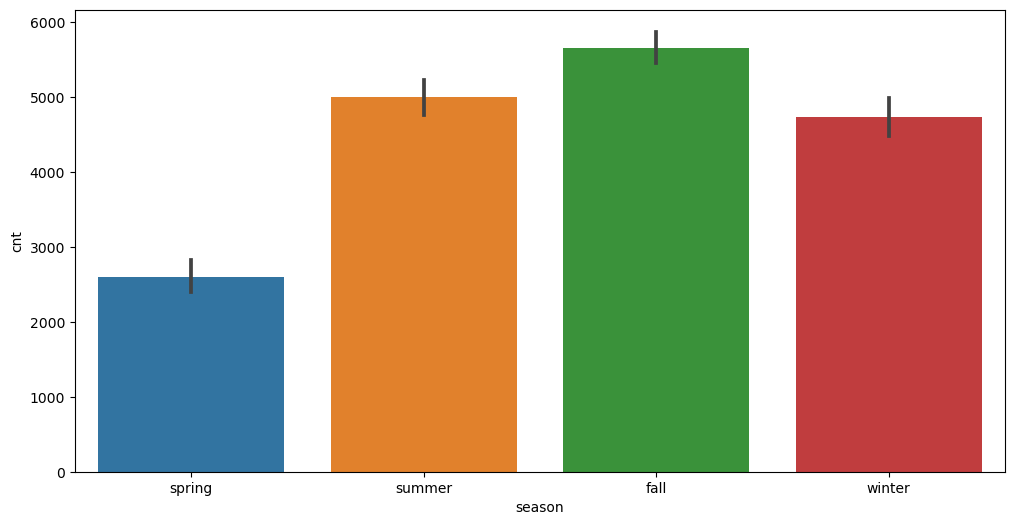

In [25]:
plt.figure(figsize = (12,6))
sns.barplot('season','cnt',data=bikesharinginitial_df)

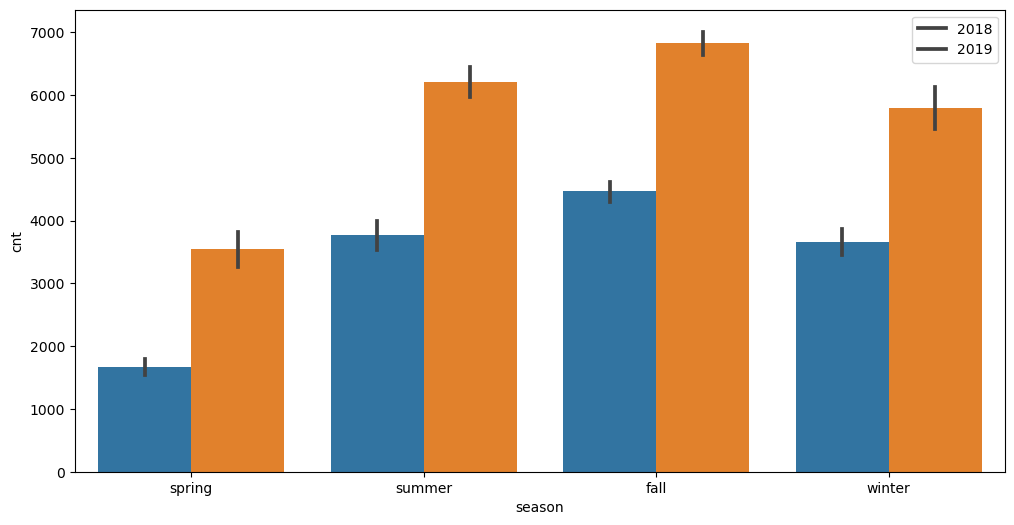

In [26]:
plt.figure(figsize = (12,6))
sns.barplot('season','cnt',data=bikesharinginitial_df, hue='yr')
plt.legend(labels=['2018', '2019'])

<AxesSubplot:xlabel='weekday', ylabel='cnt'>

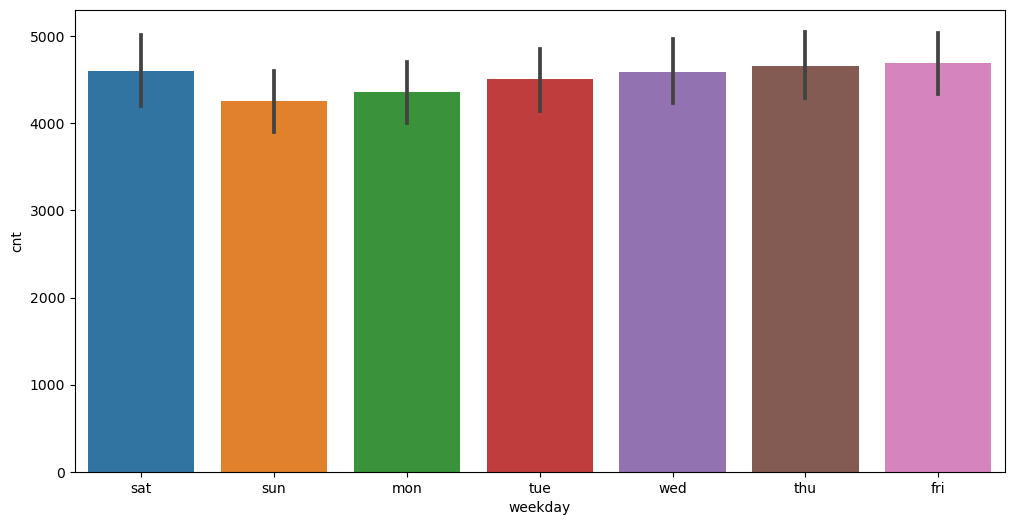

In [27]:
plt.figure(figsize = (12,6))
sns.barplot('weekday','cnt',data=bikesharinginitial_df)

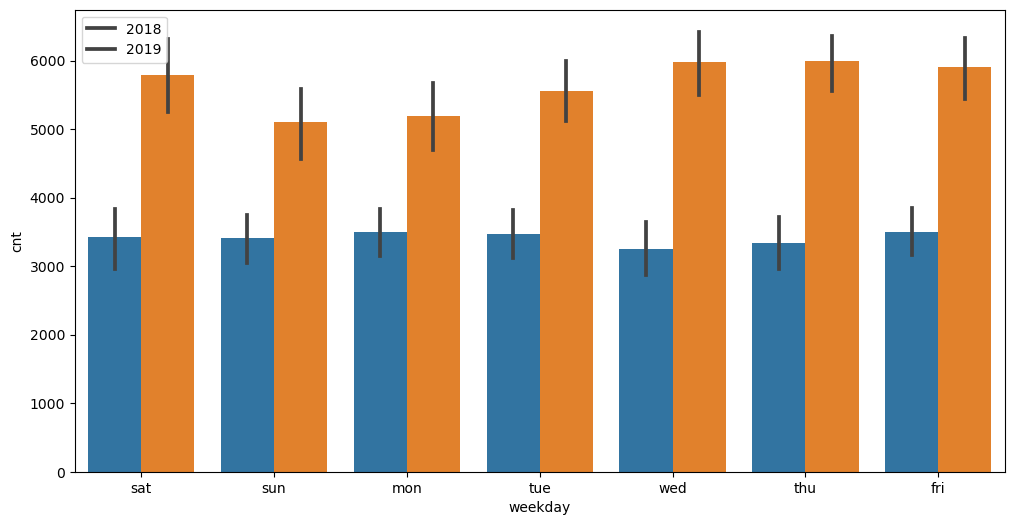

In [28]:
plt.figure(figsize = (12,6))
sns.barplot('weekday','cnt',data=bikesharinginitial_df, hue='yr')
plt.legend(labels=['2018', '2019'])

<AxesSubplot:xlabel='holiday', ylabel='cnt'>

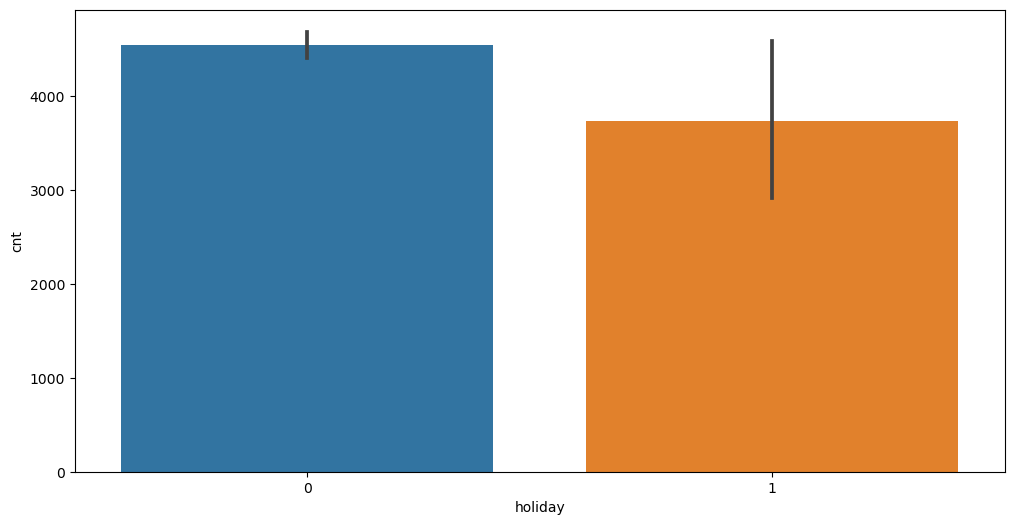

In [29]:
plt.figure(figsize = (12,6))
sns.barplot('holiday','cnt',data=bikesharinginitial_df)

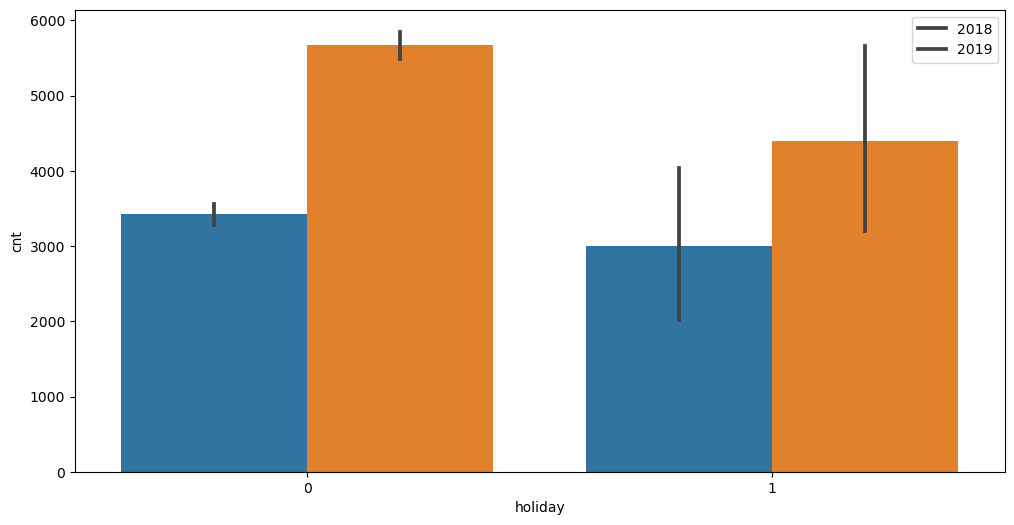

In [30]:
plt.figure(figsize = (12,6))
sns.barplot('holiday','cnt',data=bikesharinginitial_df, hue='yr')
plt.legend(labels=['2018', '2019'])

<AxesSubplot:xlabel='workingday', ylabel='cnt'>

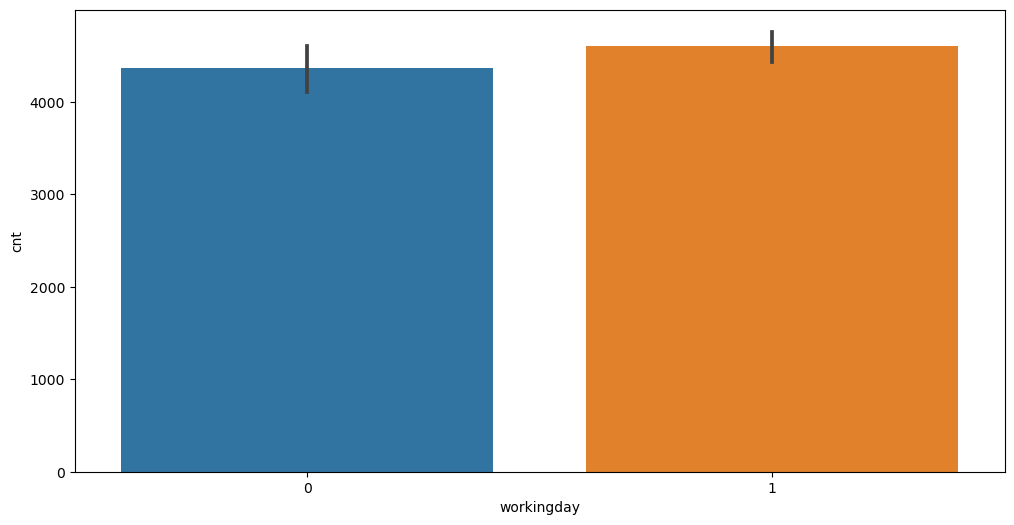

In [31]:
plt.figure(figsize = (12,6))
sns.barplot('workingday','cnt',data=bikesharinginitial_df)

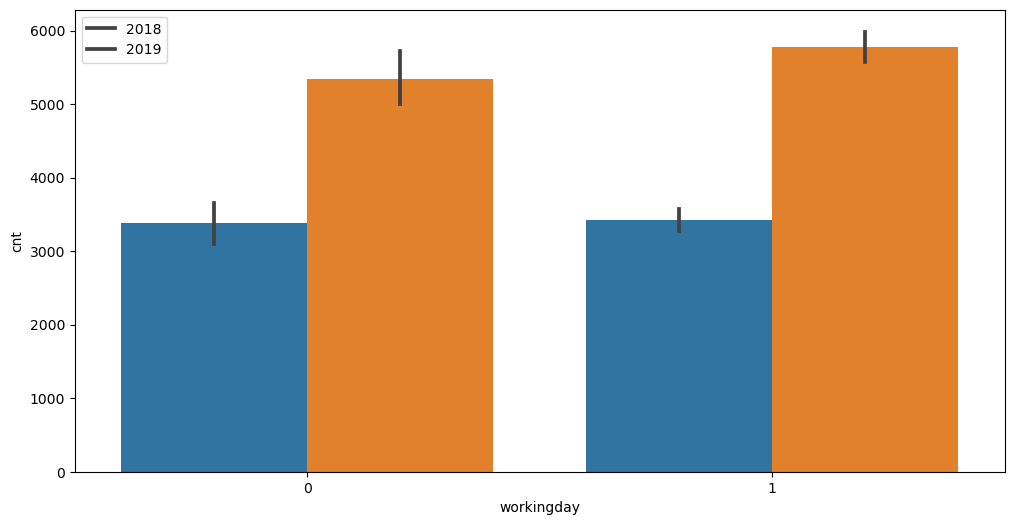

In [32]:
plt.figure(figsize = (12,6))
sns.barplot('workingday','cnt',data=bikesharinginitial_df, hue='yr')
plt.legend(labels=['2018', '2019'])

<AxesSubplot:xlabel='dtedayofmonth', ylabel='cnt'>

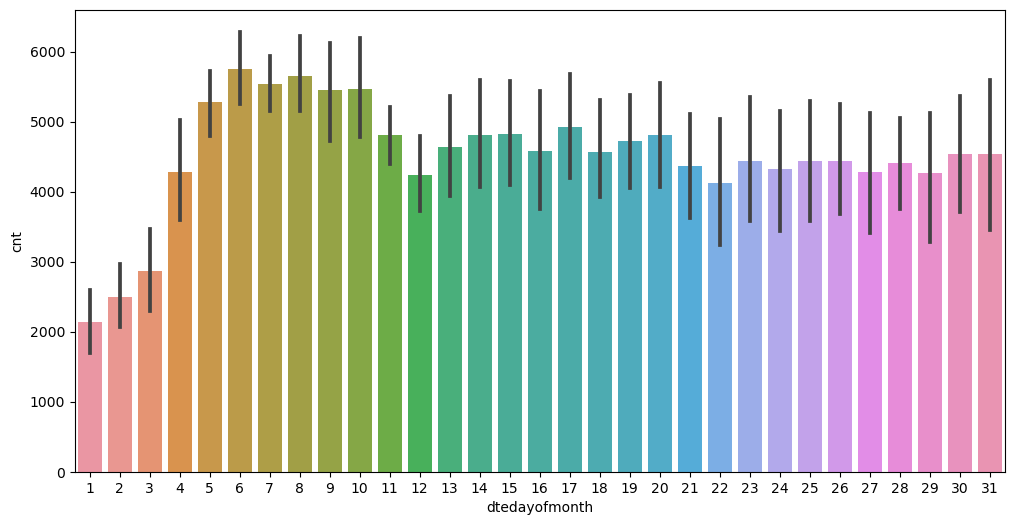

In [33]:
plt.figure(figsize = (12,6))
sns.barplot('dtedayofmonth','cnt',data=bikesharinginitial_df)

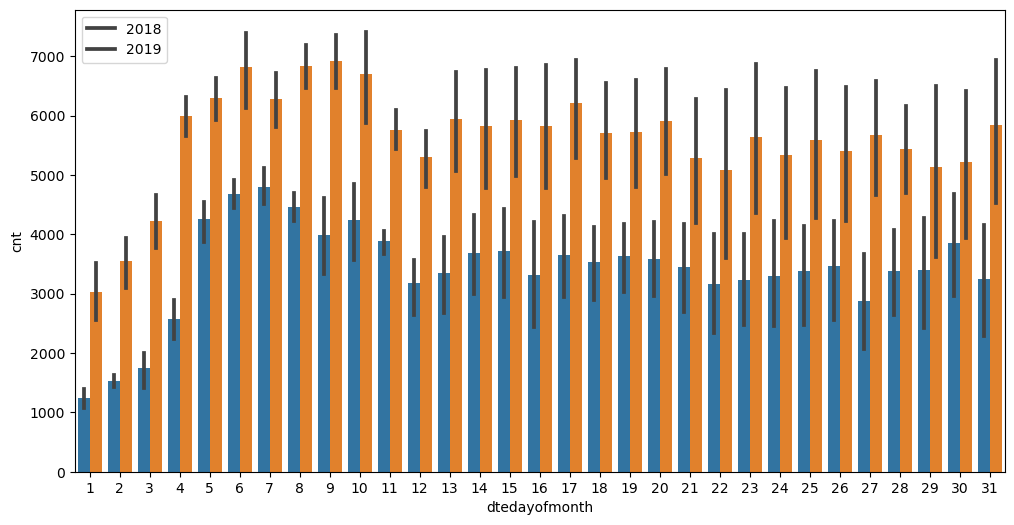

In [34]:
plt.figure(figsize = (12,6))
sns.barplot('dtedayofmonth','cnt',data=bikesharinginitial_df, hue='yr')
plt.legend(labels=['2018', '2019'])

In [35]:
# Dummy variable creation for month, weekday, weathersit and season variables.
bikesharing_month_df=pd.get_dummies(bikesharinginitial_df.mnth)
bikesharing_weekday_df=pd.get_dummies(bikesharinginitial_df.weekday)
bikesharing_weathersit_df=pd.get_dummies(bikesharinginitial_df.weathersit)
bikesharing_season_df=pd.get_dummies(bikesharinginitial_df.season)
bikesharing_final = pd.concat([bikesharinginitial_df,bikesharing_month_df,bikesharing_weekday_df,bikesharing_weathersit_df,bikesharing_season_df],axis=1)
bikesharing_final

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,thu,tue,wed,Clear,Light_snowrain,Misty,fall,spring,summer,winter
0,spring,0,jan,0,sat,0,Misty,14.110847,80.5833,10.749882,...,0,0,0,0,0,1,0,1,0,0
1,spring,0,jan,0,sun,0,Misty,14.902598,69.6087,16.652113,...,0,0,0,0,0,1,0,1,0,0
2,spring,0,jan,0,mon,1,Clear,8.050924,43.7273,16.636703,...,0,0,0,1,0,0,0,1,0,0
3,spring,0,jan,0,tue,1,Clear,8.200000,59.0435,10.739832,...,0,1,0,1,0,0,0,1,0,0
4,spring,0,jan,0,wed,1,Clear,9.305237,43.6957,12.522300,...,0,0,1,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,spring,1,dec,0,thu,1,Misty,10.420847,65.2917,23.458911,...,1,0,0,0,0,1,0,1,0,0
726,spring,1,dec,0,fri,1,Misty,10.386653,59.0000,10.416557,...,0,0,0,0,0,1,0,1,0,0
727,spring,1,dec,0,sat,0,Misty,10.386653,75.2917,8.333661,...,0,0,0,0,0,1,0,1,0,0
728,spring,1,dec,0,sun,0,Clear,10.489153,48.3333,23.500518,...,0,0,0,1,0,0,0,1,0,0


In [36]:
# dropping unnecessary columns as we have already created dummy variable out of it.

bikesharing_final.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)
bikesharing_final

,yr,holiday,workingday,temp,hum,windspeed,cnt,dtedayofmonth,apr,aug,...,thu,tue,wed,Clear,Light_snowrain,Misty,fall,spring,summer,winter
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,0,0,1,0,1,0,0
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,1,0,1,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,1,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,1,0,1,0,0,0,1,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,1,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,1,10.420847,65.2917,23.458911,2114,27,0,0,...,1,0,0,0,0,1,0,1,0,0
726,1,0,1,10.386653,59.0000,10.416557,3095,28,0,0,...,0,0,0,0,0,1,0,1,0,0
727,1,0,0,10.386653,75.2917,8.333661,1341,29,0,0,...,0,0,0,0,0,1,0,1,0,0
728,1,0,0,10.489153,48.3333,23.500518,1796,30,0,0,...,0,0,0,1,0,0,0,1,0,0


# 2) Model building and evaluation

In [37]:
Y=bikesharing_final.pop('cnt')
X=bikesharing_final
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,train_size = 0.7, random_state=100)

In [38]:
# Rescaling the features
scaler = MinMaxScaler()
bikesharing_final.head()

,yr,holiday,workingday,temp,hum,windspeed,dtedayofmonth,apr,aug,dec,...,thu,tue,wed,Clear,Light_snowrain,Misty,fall,spring,summer,winter
0,0,0,0,14.110847,80.5833,10.749882,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,0,0,0,14.902598,69.6087,16.652113,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
2,0,0,1,8.050924,43.7273,16.636703,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
4,0,0,1,9.305237,43.6957,12.522300,1,0,0,0,...,0,0,1,1,0,0,0,1,0,0


In [39]:
# Scaling numerical variable and Fit and transform training set only 

variables = ['temp','hum','windspeed']
bikesharing_final[variables] = scaler.fit_transform(bikesharing_final[variables])
bikesharing_final.head()

,yr,holiday,workingday,temp,hum,windspeed,dtedayofmonth,apr,aug,dec,...,thu,tue,wed,Clear,Light_snowrain,Misty,fall,spring,summer,winter
0,0,0,0,0.355170,0.828620,0.358625,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,0,0,0,0.379232,0.715771,0.587465,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
2,0,0,1,0.171000,0.449638,0.586868,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,0,0,1,0.175530,0.607131,0.358236,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
4,0,0,1,0.209120,0.449313,0.427345,1,0,0,0,...,0,0,1,1,0,0,0,1,0,0


## RFE and Automated approach

In [40]:
lr = LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [41]:
rfe = RFE(lr,n_features_to_select=20)
rfe.fit(X_train,Y_train)

RFE(estimator=LinearRegression(), n_features_to_select=20)

In [42]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', False, 4),
 ('hum', False, 12),
 ('windspeed', False, 9),
 ('dtedayofmonth', False, 14),
 ('apr', False, 6),
 ('aug', True, 1),
 ('dec', True, 1),
 ('feb', True, 1),
 ('jan', True, 1),
 ('july', False, 11),
 ('june', True, 1),
 ('mar', True, 1),
 ('may', True, 1),
 ('nov', True, 1),
 ('oct', False, 10),
 ('sep', True, 1),
 ('fri', False, 8),
 ('mon', True, 1),
 ('sat', True, 1),
 ('sun', True, 1),
 ('thu', False, 13),
 ('tue', False, 2),
 ('wed', False, 7),
 ('Clear', True, 1),
 ('Light_snowrain', True, 1),
 ('Misty', True, 1),
 ('fall', False, 5),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', False, 3)]

In [43]:
#checking columns selected via RFE
columns=X_train.columns[rfe.support_]
print(columns)

Index(['yr', 'holiday', 'workingday', 'aug', 'dec', 'feb', 'jan', 'june',
       'mar', 'may', 'nov', 'sep', 'mon', 'sat', 'sun', 'Clear',
       'Light_snowrain', 'Misty', 'spring', 'summer'],
      dtype='object')


In [44]:
# checking rejected columns
X_train.columns[~rfe.support_]

Index(['temp', 'hum', 'windspeed', 'dtedayofmonth', 'apr', 'july', 'oct',
       'fri', 'thu', 'tue', 'wed', 'fall', 'winter'],
      dtype='object')

In [45]:
def buildmodel(cols):
    X_train_rfe=X_train[cols]
    X_train_rfe = sm.add_constant(X_train_rfe)
    lr=sm.OLS(Y_train,X_train_rfe.astype(float)).fit()
    return lr

In [46]:
lr1=buildmodel(columns)
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     107.1
Date:                Tue, 16 May 2023   Prob (F-statistic):          4.46e-156
Time:                        22:23:42   Log-Likelihood:                -4142.1
No. Observations:                 505   AIC:                             8322.
Df Residuals:                     486   BIC:                             8402.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           2095.7009     84.411     24.827      0.000    1929.846    2261.556
yr              2116.5123     80.896     26.163      0.000    1957.562    2275.462
holiday          362.3044    188.493      1.922      0.055      -8.058     732.666
workingday       776.2520     71.002     10.933      0.000     636.743     915.761
aug              174.0739    163.825      1.063      0.289    -147.819     495.967
dec            -1133.4337    167.663     -6.760      0.000   -1462.868    -803.999
feb             -900.3978    263.069     -3.423      0.001   -1417.291    -383.505
jan            -1405.1865    255.529     -5.499      0.000   -1907.264    -903.109
june             712.1998    178.878      3.981      0.000     360.730    1063.670
mar             -235.7862    203.773     -1.157      0.248    -636.171     164.598
may              653.0553    183.724      3.555      0.000     292.063    1014.047
nov            -1256.3579    164.868     -7.620      0.000   -1580.300    -932.416
sep              513.5505    168.591      3.046      0.002     182.294     844.807
mon             -262.8414    120.480     -2.182      0.030    -499.568     -26.115
sat              684.1234    103.783      6.592      0.000     480.205     888.041
sun              273.0212    103.286      2.643      0.008      70.079     475.963
Clear           1901.4108     80.360     23.661      0.000    1743.514    2059.307
Light_snowrain  -920.5635    175.257     -5.253      0.000   -1264.918    -576.208
Misty           1114.8536     87.035     12.809      0.000     943.843    1285.865
spring         -1750.6982    208.051     -8.415      0.000   -2159.489   -1341.907
summer          -730.4043    141.897     -5.147      0.000   -1009.212    -451.596
==============================================================================
Omnibus:                       97.040   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              303.713
Skew:                          -0.889   Prob(JB):                     1.12e-66
Kurtosis:                       6.358   Cond. No.                     2.89e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.54e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [47]:
#Detecting Multicollinearity with VIF
def calc_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [48]:
calc_vif(columns)

          Features   VIF
15           Clear   inf
2       workingday   inf
1          holiday   inf
17           Misty   inf
16  Light_snowrain   inf
13             sat   inf
14             sun   inf
18          spring  4.80
6              jan  3.04
5              feb  2.71
19          summer  2.38
8              mar  2.06
9              may  1.71
4              dec  1.54
3              aug  1.39
10             nov  1.38
11             sep  1.35
7             june  1.32
12             mon  1.16
0               yr  1.02


### Model 2

In [49]:
# VIF > 5 , P-value > 0.05

In [50]:
# High VIF and high P-value columns : holiday (inf VIF and P value >0.05)
# low VIF and high P-value columns : aug, mar
# High VIF and low P-value columns :  Clear workingday Misty Light_snowrain sat sun
# low VIF and low P-value columns : spring jan feb summer mar may dec aug nov sep june mon yr

In [51]:
# holiday has infinite VIF and P value >0.05 so dropping the column
columns_2 = columns.drop(['holiday'])
lr2=buildmodel(columns_2)
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     107.1
Date:                Tue, 16 May 2023   Prob (F-statistic):          4.46e-156
Time:                        22:23:42   Log-Likelihood:                -4142.1
No. Observations:                 505   AIC:                             8322.
Df Residuals:                     486   BIC:                             8402.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           2367.4292    196.288     12.061      0.000    1981.751    2753.107
yr              2116.5123     80.896     26.163      0.000    1957.562    2275.462
workingday       413.9477    234.213      1.767      0.078     -46.248     874.143
aug              174.0739    163.825      1.063      0.289    -147.819     495.967
dec            -1133.4337    167.663     -6.760      0.000   -1462.868    -803.999
feb             -900.3978    263.069     -3.423      0.001   -1417.291    -383.505
jan            -1405.1865    255.529     -5.499      0.000   -1907.264    -903.109
june             712.1998    178.878      3.981      0.000     360.730    1063.670
mar             -235.7862    203.773     -1.157      0.248    -636.171     164.598
may              653.0553    183.724      3.555      0.000     292.063    1014.047
nov            -1256.3579    164.868     -7.620      0.000   -1580.300    -932.416
sep              513.5505    168.591      3.046      0.002     182.294     844.807
mon             -262.8414    120.480     -2.182      0.030    -499.568     -26.115
sat              321.8190    259.717      1.239      0.216    -188.489     832.127
sun              -89.2832    258.060     -0.346      0.730    -596.333     417.767
Clear           1991.9869     96.090     20.730      0.000    1803.183    2180.790
Light_snowrain  -829.9874    187.751     -4.421      0.000   -1198.891    -461.083
Misty           1205.4297    103.595     11.636      0.000    1001.880    1408.980
spring         -1750.6982    208.051     -8.415      0.000   -2159.489   -1341.907
summer          -730.4043    141.897     -5.147      0.000   -1009.212    -451.596
==============================================================================
Omnibus:                       97.040   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              303.713
Skew:                          -0.889   Prob(JB):                     1.12e-66
Kurtosis:                       6.358   Cond. No.                     3.75e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.16e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [52]:
calc_vif(columns_2)

          Features    VIF
14           Clear  24.10
16           Misty  15.76
1       workingday   7.38
13             sun   5.08
12             sat   5.02
17          spring   4.80
5              jan   3.04
4              feb   2.71
18          summer   2.38
15  Light_snowrain   2.13
7              mar   2.06
8              may   1.71
3              dec   1.54
2              aug   1.39
9              nov   1.38
10             sep   1.35
6             june   1.32
11             mon   1.16
0               yr   1.02


### Model 3

In [53]:
# High VIF and high P-value columns : sat,sun, workingday
# low VIF and high P-value columns : aug, mar
# High VIF and low P-value columns :  Clear Misty Light_snowrain
# low VIF and low P-value columns : spring jan feb summer mar may dec aug nov sep june mon yr

In [54]:
#workingday has high VIF so dropping the column
columns_3 = columns_2.drop(['workingday'])
lr3=buildmodel(columns_3)
lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     112.7
Date:                Tue, 16 May 2023   Prob (F-statistic):          1.94e-156
Time:                        22:23:42   Log-Likelihood:                -4143.7
No. Observations:                 505   AIC:                             8323.
Df Residuals:                     487   BIC:                             8399.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           2672.6087     93.549     28.569      0.000    2488.800    2856.418
yr              2121.7682     81.018     26.189      0.000    1962.581    2280.956
aug              191.4790    163.885      1.168      0.243    -130.530     513.488
dec            -1125.3450    167.966     -6.700      0.000   -1455.373    -795.317
feb             -867.7105    262.990     -3.299      0.001   -1384.445    -350.976
jan            -1379.5492    255.672     -5.396      0.000   -1881.906    -877.192
june             736.6600    178.730      4.122      0.000     385.482    1087.838
mar             -201.8585    203.308     -0.993      0.321    -601.329     197.612
may              669.5675    183.886      3.641      0.000     308.259    1030.876
nov            -1279.4304    164.708     -7.768      0.000   -1603.057    -955.804
sep              506.1213    168.905      2.996      0.003     174.248     837.995
mon             -314.9697    117.069     -2.690      0.007    -544.992     -84.948
sat              -84.2934    121.318     -0.695      0.488    -322.666     154.079
sun             -493.5809    119.703     -4.123      0.000    -728.780    -258.382
Clear           2085.6567     80.327     25.964      0.000    1927.826    2243.487
Light_snowrain  -719.0801    177.339     -4.055      0.000   -1067.525    -370.636
Misty           1306.0321     86.745     15.056      0.000    1135.592    1476.472
spring         -1779.9549    207.843     -8.564      0.000   -2188.335   -1371.575
summer          -740.4422    142.092     -5.211      0.000   -1019.632    -461.252
==============================================================================
Omnibus:                      101.085   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.445
Skew:                          -0.938   Prob(JB):                     4.71e-67
Kurtosis:                       6.316   Cond. No.                     4.08e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.24e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [55]:
calc_vif(columns_3)

          Features   VIF
13           Clear  4.99
16          spring  4.77
15           Misty  3.66
4              jan  3.03
3              feb  2.70
17          summer  2.37
6              mar  2.04
7              may  1.70
2              dec  1.53
1              aug  1.38
8              nov  1.37
9              sep  1.35
5             june  1.31
14  Light_snowrain  1.10
12             sun  1.09
11             sat  1.09
10             mon  1.09
0               yr  1.02


### Model 4

In [56]:
# High VIF and high P-value columns : NA
# low VIF and high P-value columns : aug, mar, sat
# High VIF and low P-value columns :  Clear Misty Light_snowrain, spring
# low VIF and low P-value columns :  jan feb summer mar may dec aug nov sep june mon yr sun

In [57]:
# sat has highest p-vale so dropping the column
columns_4 = columns_3.drop(['sat'])
lr4=buildmodel(columns_4)
lr4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     119.8
Date:                Tue, 16 May 2023   Prob (F-statistic):          2.21e-157
Time:                        22:23:42   Log-Likelihood:                -4143.9
No. Observations:                 505   AIC:                             8322.
Df Residuals:                     488   BIC:                             8394.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           2657.9300     91.084     29.181      0.000    2478.965    2836.895
yr              2123.7031     80.927     26.242      0.000    1964.695    2282.712
aug              192.7534    163.788      1.177      0.240    -129.063     514.570
dec            -1126.3271    167.871     -6.709      0.000   -1456.166    -796.488
feb             -863.4933    262.780     -3.286      0.001   -1379.814    -347.173
jan            -1387.9241    255.253     -5.437      0.000   -1889.454    -886.394
june             740.8600    178.533      4.150      0.000     390.071    1091.649
mar             -201.7879    203.201     -0.993      0.321    -601.044     197.468
may              671.4337    183.769      3.654      0.000     310.357    1032.510
nov            -1271.1162    164.186     -7.742      0.000   -1593.715    -948.517
sep              511.5176    168.637      3.033      0.003     180.173     842.862
mon             -297.8674    114.391     -2.604      0.009    -522.627     -73.108
sun             -476.6623    117.138     -4.069      0.000    -706.820    -246.504
Clear           2079.2254     79.750     26.072      0.000    1922.530    2235.921
Light_snowrain  -720.8776    177.226     -4.068      0.000   -1069.099    -372.657
Misty           1299.5822     86.201     15.076      0.000    1130.212    1468.953
spring         -1773.9840    207.556     -8.547      0.000   -2181.797   -1366.171
summer          -737.8295    141.967     -5.197      0.000   -1016.772    -458.887
==============================================================================
Omnibus:                      102.459   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              309.992
Skew:                          -0.951   Prob(JB):                     4.85e-68
Kurtosis:                       6.334   Cond. No.                     8.87e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.31e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [58]:
calc_vif(columns_4)

          Features   VIF
15          spring  4.77
12           Clear  4.64
14           Misty  3.45
4              jan  3.02
3              feb  2.69
16          summer  2.37
6              mar  2.04
7              may  1.70
2              dec  1.53
1              aug  1.38
8              nov  1.36
9              sep  1.35
5             june  1.31
13  Light_snowrain  1.09
11             sun  1.04
10             mon  1.04
0               yr  1.02


### Model 5

In [59]:
# High VIF and high P-value columns : NA
# low VIF and high P-value columns : aug, mar
# High VIF and low P-value columns :  Clear Misty Light_snowrain, spring
# low VIF and low P-value columns :  jan feb summer mar may dec aug nov sep june mon yr sun

In [60]:
# aug has highest p-vale so dropping the column
columns_5 = columns_4.drop(['aug'])
lr5=buildmodel(columns_5)
lr5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     127.6
Date:                Tue, 16 May 2023   Prob (F-statistic):          3.82e-158
Time:                        22:23:43   Log-Likelihood:                -4144.6
No. Observations:                 505   AIC:                             8321.
Df Residuals:                     489   BIC:                             8389.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           2699.0713     84.141     32.078      0.000    2533.749    2864.394
yr              2125.5941     80.943     26.260      0.000    1966.555    2284.633
dec            -1182.8693    160.912     -7.351      0.000   -1499.034    -866.705
feb             -903.6562    260.657     -3.467      0.001   -1415.803    -391.510
jan            -1428.3014    253.036     -5.645      0.000   -1925.473    -931.130
june             708.1963    176.432      4.014      0.000     361.538    1054.855
mar             -230.8663    201.772     -1.144      0.253    -627.314     165.581
may              655.0067    183.310      3.573      0.000     294.834    1015.180
nov            -1335.1037    154.983     -8.615      0.000   -1639.618   -1030.590
sep              447.2357    159.609      2.802      0.005     133.632     760.839
mon             -293.0443    114.363     -2.562      0.011    -517.747     -68.342
sun             -477.8497    117.180     -4.078      0.000    -708.089    -247.611
Clear           2101.5759     77.486     27.122      0.000    1949.329    2253.822
Light_snowrain  -725.9913    177.243     -4.096      0.000   -1074.243    -377.740
Misty           1323.4867     83.806     15.792      0.000    1158.822    1488.152
spring         -1799.3871    206.511     -8.713      0.000   -2205.146   -1393.628
summer          -787.0436    135.722     -5.799      0.000   -1053.714    -520.374
==============================================================================
Omnibus:                      105.714   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              324.225
Skew:                          -0.976   Prob(JB):                     3.94e-71
Kurtosis:                       6.406   Cond. No.                     6.62e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.34e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [61]:
calc_vif(columns_5)

          Features   VIF
14          spring  4.71
11           Clear  3.55
3              jan  2.97
13           Misty  2.75
2              feb  2.65
15          summer  2.16
5              mar  2.01
6              may  1.69
1              dec  1.41
4             june  1.28
7              nov  1.21
8              sep  1.21
12  Light_snowrain  1.08
9              mon  1.04
10             sun  1.04
0               yr  1.02


### Model 6

In [62]:
# High VIF and high P-value columns : NA
# low VIF and high P-value columns :  mar, sat
# High VIF and low P-value columns :  Clear, spring 
# low VIF and low P-value columns : spring jan feb summer mar may dec aug nov sep june mon yr sun Misty Light_snowrain

In [63]:
# aug has highest p-vale so dropping the column
columns_6 = columns_5.drop(['mar'])
lr6=buildmodel(columns_6)
lr6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     136.6
Date:                Tue, 16 May 2023   Prob (F-statistic):          6.14e-159
Time:                        22:23:43   Log-Likelihood:                -4145.3
No. Observations:                 505   AIC:                             8321.
Df Residuals:                     490   BIC:                             8384.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           2682.5890     82.925     32.350      0.000    2519.657    2845.521
yr              2127.8541     80.944     26.288      0.000    1968.813    2286.895
dec            -1116.6483    150.191     -7.435      0.000   -1411.746    -821.551
feb             -736.4061    215.882     -3.411      0.001   -1160.575    -312.237
jan            -1260.7837    206.444     -6.107      0.000   -1666.408    -855.160
june             754.5889    171.764      4.393      0.000     417.104    1092.074
may              718.9588    174.637      4.117      0.000     375.830    1062.088
nov            -1319.1645    154.404     -8.544      0.000   -1622.540   -1015.789
sep              463.9940    158.986      2.918      0.004     151.616     776.371
mon             -289.4837    114.356     -2.531      0.012    -514.173     -64.795
sun             -473.4411    117.154     -4.041      0.000    -703.627    -243.255
Clear           2101.9201     77.510     27.118      0.000    1949.627    2254.213
Light_snowrain  -738.1622    176.979     -4.171      0.000   -1085.894    -390.430
Misty           1318.8311     83.734     15.750      0.000    1154.309    1483.353
spring         -1950.8895    158.526    -12.306      0.000   -2262.363   -1639.416
summer          -834.6837    129.218     -6.459      0.000   -1088.574    -580.793
==============================================================================
Omnibus:                      103.541   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              303.240
Skew:                          -0.972   Prob(JB):                     1.42e-66
Kurtosis:                       6.261   Cond. No.                     8.29e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.49e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [64]:
calc_vif(columns_6)

          Features   VIF
10           Clear  3.48
13          spring  2.78
12           Misty  2.67
3              jan  1.97
14          summer  1.96
2              feb  1.82
5              may  1.54
1              dec  1.23
4             june  1.21
6              nov  1.20
7              sep  1.20
11  Light_snowrain  1.06
8              mon  1.04
9              sun  1.04
0               yr  1.02


In [65]:
# High VIF and high P-value columns : NA
# low VIF and high P-value columns : NA
# High VIF and low P-value columns : NA
# low VIF and low P-value columns : spring jan feb summer mar may dec aug nov sep june mon yr sun Misty Light_snowrain

In [66]:
# VIF values seem to be acceptable

In [67]:
lr6.params

const             2682.589048
yr                2127.854105
dec              -1116.648347
feb               -736.406111
jan              -1260.783717
june               754.588853
may                718.958773
nov              -1319.164538
sep                463.993951
mon               -289.483749
sun               -473.441077
Clear             2101.920089
Light_snowrain    -738.162169
Misty             1318.831128
spring           -1950.889471
summer            -834.683715
dtype: float64

In [68]:
# Building final model

In [69]:
cols=['yr','dec','feb','jan','june','may','nov','sep','mon','sun','Clear','Light_snowrain','Misty','spring','summer']
#Build a model with above columns
lr_sk = LinearRegression()
lr_sk.fit(X_train[cols],Y_train)

LinearRegression()

Residual Analysis

In [70]:
Y_train_pred = lr_sk.predict(X_train[cols])

In [71]:
r2_score(Y_train,Y_train_pred)

0.795988223040719

Text(0.5, 0, 'Errors')

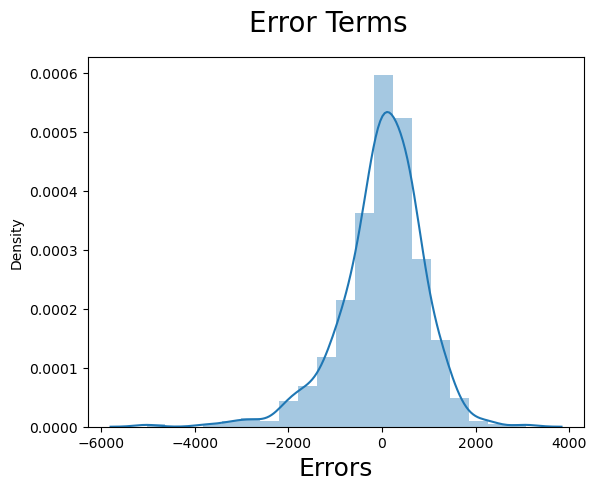

In [72]:
# Plotting error terms
fig = plt.figure()
sns.distplot((Y_train - Y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

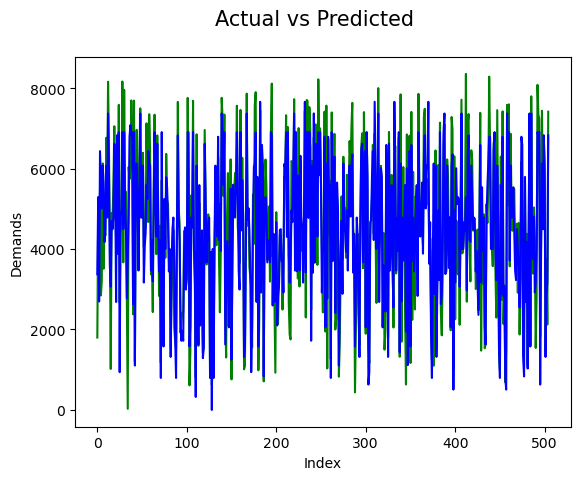

In [73]:
# Actual vs Predicted
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,Y_train, color="green")
plt.plot(c,Y_train_pred, color="blue")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

Errors are normally distributed, so the model seems ok

Linearity Check

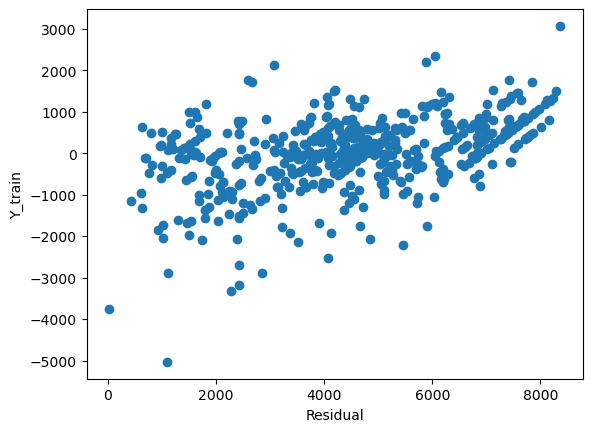

In [74]:
residual = (Y_train - Y_train_pred)
plt.scatter(Y_train,residual)
plt.ylabel("Y_train")
plt.xlabel("Residual")
plt.show()

Check on Test Data set

In [75]:
num_vars = ['temp','hum','windspeed']

#Test data to be transformed only, no fitting
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [76]:
cols=['yr','dec','feb','jan','june','may','nov','sep','mon','sun','Clear','Light_snowrain','Misty','spring','summer']

#Predict the values for test data
Y_test_pred = lr_sk.predict(X_test[cols])

R2 value

In [77]:
r2_score(Y_test,Y_test_pred)

0.8307329465108209

Text(0, 0.5, 'y_test_pred')

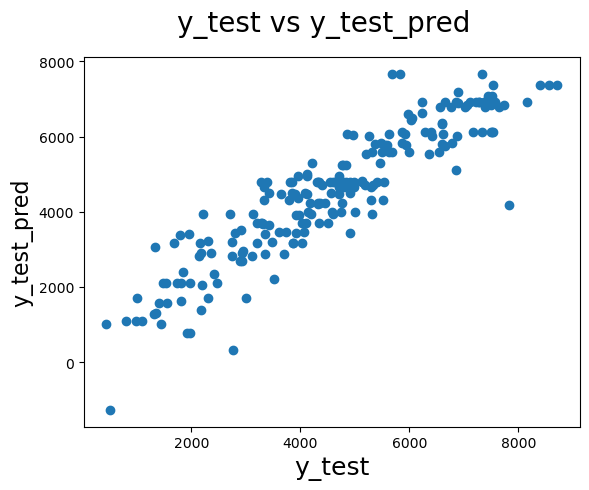

In [78]:
# Plotting y_test and y_test_pred to understand the spread

fig = plt.figure()
plt.scatter(Y_test, Y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_test_pred', fontsize = 16)

Above fig Shows a Linear relationship

Plotting Actual vs Predicted test data

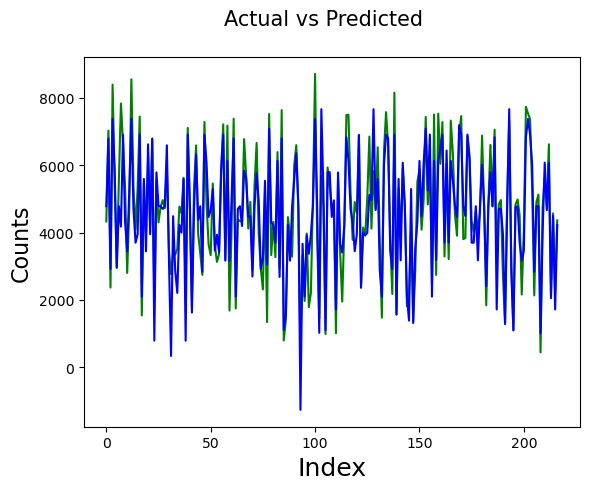

In [79]:
c = [i for i in range(0,len(X_test),1)]
plt.plot(c,Y_test, color="green")
plt.plot(c,Y_test_pred, color="blue")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index', fontsize=18)                   
plt.ylabel('Counts', fontsize=16) 
plt.show()

Predected Data above seems very close to actual

##### Making Predictions

Comparision between Training and Testing dataset:
- Train dataset R^2          : 0.83
- Test dataset R^2           : 0.79

Conclusion
Significant variables to predict the demand for shared bikes
- Year (2019)
- months('dec','feb','jan','june','may','nov','sep')
- Days ('mon','sun')
- weathersit ('Clear','Light_snowrain','Misty')
- season('spring','summer')